In [1]:
# This is the import cell
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
first = True
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 10)

In [2]:
# Get the current path
if first:
    parent = os.getcwd()
os.chdir(parent)

# Grab file names from data folder
data = os.listdir('data')
data.remove('.DS_Store')
print(data)

['area_pe250_ep51_phi50.txt', 'area_pe450_ep85_phi50.txt', 'area_pe350_ep68_phi50.txt', 'area_pe300_ep60_phi50.txt', 'area_pe500_ep93_phi50.txt', 'area_pe100_ep26_phi50.txt', 'area_pe400_ep76_phi50.txt', 'area_pe150_ep35_phi50.txt', 'area_pe50_ep18_phi50.txt', 'area_pe200_ep43_phi50.txt']


In [3]:
# Some functions to get the relevant data from the filenames
def checkFile(fname, ref):
    boolean = False
    for i in xrange(len(fname)):
        if fname[i] == ref[0]:
            for j in xrange(1, len(ref)):
                if fname[i + j] == ref[j]:
                    boolean = True
                    break
    return boolean

def txtValue(fname, string):
    out = ""
    index = 0
    for i in xrange(len(fname)):
        if fname[i] == string[0]:
            for j in xrange(1, len(string)):
                if fname[i + j] == string[j]:
                    if j == (len(string) - 1):
                        index = i + j
    index += 1
    mybool = True
    while mybool:
        if fname[index].isdigit():
            out = out + fname[index]
            index += 1
        else:
            mybool = False
    return float(out)

# Sorting functions
def multiSort(arr1, arr2, arr3):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for PeR, PeS, xS in this case
    cpy1 = np.copy(arr1)
    cpy2 = np.copy(arr2)
    cpy3 = np.copy(arr3)
    ind = np.arange(0, len(arr1))
    for i in xrange(len(cpy1)):
        for j in xrange(len(cpy1)):
            # Sort by first variable
            if cpy1[i] > cpy1[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            # If first variable is equal, resort to second variable
            elif cpy1[i] == cpy1[j] and cpy2[i] > cpy2[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] > cpy3[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]      
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in xrange(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [4]:
# Grab parameters, sort them
peList = []
paList = []
pbList = []
xaList = []
epList = []
phiList = []
for i in xrange(len(data)):
    if checkFile(data[i], "pe"):
        peList.append(txtValue(data[i], "pe"))
    else:
        peList.append(0)
    
    if checkFile(data[i], "pa"):
        paList.append(txtValue(data[i], "pa"))
    else:
        paList.append(0)
        
    if checkFile(data[i], "pb"):
        pbList.append(txtValue(data[i], "pb"))
    else:
        pbList.append(0)
        
    if checkFile(data[i], "xa"):
        xaList.append(txtValue(data[i], "xa"))
    else:
        xaList.append(100.)
        
    if checkFile(data[i], "ep"):
        epList.append(txtValue(data[i], "ep"))
    else:
        epList.append(1.)
        
    if checkFile(data[i], "phi"):
        phiList.append(txtValue(data[i], "phi"))
    else:
        phiList.append(60.)

# Take a look at your lists
# print(peList)
# print(paList) 
# print(pbList) 
# print(xaList) 
# print(epList) 
# print(phiList)        

# Sort the arrays
if len(paList) > 1:
    # Sort them!
    print("Sorting... ")
    indArr = multiSort(peList, epList, phiList)
#     indArr = multiSort(paList, epList, phiList)
    indSort(data, indArr)
    indSort(peList, indArr)
    indSort(paList, indArr)
    indSort(pbList, indArr)
    indSort(xaList, indArr)
    indSort(epList, indArr)
    indSort(phiList, indArr)

# Print the sorted array
print("Sorted textfiles:")
for i in data:
    print(i)
    
# Now that the data is sorted, read it into a dataframe
all_data = []
os.chdir('data')
for i in xrange(len(data)):
    df = pd.read_csv(data[i], sep='\s+', header=0)
    all_data.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_data[0])
# print(all_data[0]['Timestep'])
# print(all_data[0]['Timestep'][0])

Sorting... 
Sorted textfiles:
area_pe50_ep18_phi50.txt
area_pe100_ep26_phi50.txt
area_pe150_ep35_phi50.txt
area_pe200_ep43_phi50.txt
area_pe250_ep51_phi50.txt
area_pe300_ep60_phi50.txt
area_pe350_ep68_phi50.txt
area_pe400_ep76_phi50.txt
area_pe450_ep85_phi50.txt
area_pe500_ep93_phi50.txt


,Timestep,Gas_A,Gas_B,Gas_tot,Dense_A,Dense_B,Dense_tot,Lc_numA,Lc_numB,Lg_clust,MCS,sigALL,sigAA,sigAB,sigBB,phiEff,Lc_area_A,Lc_area_B,lc_area,den_area_A,den_area_B,den_area,Box_area
0,0.0,50000,0,50000,0,0,0,4,0,4,0,1.0347,1.0347,0.0,0.0,0.50,3.1416,0.0,3.1416,0.0000,0.0,0.0000,78539.82
1,91666.0,50000,0,50000,0,0,0,23,0,23,0,1.0213,1.0213,0.0,0.0,0.50,17.5830,0.0,17.5830,0.0000,0.0,0.0000,78539.82
2,183332.0,50000,0,50000,0,0,0,22,0,22,0,1.0206,1.0206,0.0,0.0,0.50,16.9264,0.0,16.9264,0.0000,0.0,0.0000,78539.82
3,274998.0,50000,0,50000,0,0,0,26,0,26,0,1.0221,1.0221,0.0,0.0,0.50,19.8696,0.0,19.8696,0.0000,0.0,0.0000,78539.82
4,366664.0,50000,0,50000,0,0,0,33,0,33,0,1.0272,1.0272,0.0,0.0,0.50,25.2714,0.0,25.2714,0.0000,0.0,0.0000,78539.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,91299336.0,39276,0,39276,10724,0,10724,1444,0,1444,428,1.0155,1.0155,0.0,0.0,0.49,1097.7635,0.0,1097.7635,8158.2150,0.0,8158.2150,78539.82
997,91391002.0,39900,0,39900,10100,0,10100,1482,0,1482,439,1.0193,1.0193,0.0,0.0,0.49,1124.9377,0.0,1124.9377,7681.2009,0.0,7681.2009,78539.82
998,91482668.0,39426,0,39426,10574,0,10574,1292,0,1292,440,1.0232,1.0232,0.0,0.0,0.49,980.6970,0.0,980.6970,8044.7040,0.0,8044.7040,78539.82
999,91574334.0,39056,0,39056,10944,0,10944,1486,0,1486,456,1.0135,1.0135,0.0,0.0,0.49,1127.8306,0.0,1127.8306,8325.3582,0.0,8325.3582,78539.82


In [5]:
# Function to get conversion from timesteps to Brownian time
def computeTauPerTstep(epsilon):
    kBT = 1.0
    tstepPerTau = int(epsilon / (kBT * 0.00001))
    return 1. / tstepPerTau

# Grab the parameters from each file, store in a dataframe
headers = ['partAll', 'partA', 'partB', 'pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params = pd.DataFrame(columns=headers)
for i in xrange(len(all_data)):
    partAll = all_data[i]['Gas_tot'][0] + all_data[i]['Dense_tot'][0]
    partA = all_data[i]['Gas_A'][0] + all_data[i]['Dense_A'][0]
    partB = all_data[i]['Gas_B'][0] + all_data[i]['Dense_B'][0]
    pe = int(peList[i])
    pa = int(paList[i])
    pb = int(pbList[i])
    xa = float(xaList[i])
    ep = int(epList[i])
    phi = float(phiList[i])
    tauPerdt = computeTauPerTstep(ep)
    df = pd.DataFrame([[partAll, partA, partB, pe, pa, pb, xa, ep, phi, tauPerdt]], columns=headers)
    params = params.append(df, ignore_index = True)
display(params)

,partAll,partA,partB,pe,peA,peB,xA,eps,phi,tauPer_dt
0,50000,50000,0,50,0,0,100.0,18,50.0,5.555559e-07
1,50000,50000,0,100,0,0,100.0,26,50.0,3.846154e-07
2,50000,50000,0,150,0,0,100.0,35,50.0,2.857144e-07
3,50000,50000,0,200,0,0,100.0,43,50.0,2.325581e-07
4,50000,50000,0,250,0,0,100.0,51,50.0,1.960784e-07
5,50000,50000,0,300,0,0,100.0,60,50.0,1.666667e-07
6,50000,50000,0,350,0,0,100.0,68,50.0,1.470588e-07
7,50000,50000,0,400,0,0,100.0,76,50.0,1.315790e-07
8,50000,50000,0,450,0,0,100.0,85,50.0,1.176471e-07
9,50000,50000,0,500,0,0,100.0,93,50.0,1.075269e-07


In [6]:
# Let's add columns to the time-resolved simulation data
for i in xrange(len(all_data)):
    # Move timestep column from timesteps to rotational relaxation time
    all_data[i]['Timestep'] *= params['tauPer_dt'][i] * 3.0
    
    # New column for number of clusters
    all_data[i]['nClust'] = all_data[i]['Dense_tot'] / all_data[i]['MCS']
    
    # New column for area of gas phase
    all_data[i]['a_gas'] = all_data[i]['Box_area'] - all_data[i]['den_area']
    
    # New columns for area fractions:
    all_data[i]['phiLC_A'] = all_data[i]['Lc_area_A'] / all_data[i]['Box_area']
    all_data[i]['phiLC_B'] = all_data[i]['Lc_area_B'] / all_data[i]['Box_area']
    all_data[i]['phiLC'] = all_data[i]['lc_area'] / all_data[i]['Box_area']
    all_data[i]['phiC_A'] = all_data[i]['den_area_A'] / all_data[i]['Box_area']
    all_data[i]['phiC_B'] = all_data[i]['den_area_B'] / all_data[i]['Box_area']
    all_data[i]['phiC'] = all_data[i]['den_area'] / all_data[i]['Box_area']
    all_data[i]['phiG_A'] = (all_data[i]['Gas_A'] * np.pi * 0.25) / all_data[i]['Box_area']
    all_data[i]['phiG_B'] = (all_data[i]['Gas_B'] * np.pi * 0.25) / all_data[i]['Box_area']
    all_data[i]['phiG'] = (all_data[i]['Gas_tot'] * np.pi * 0.25) / all_data[i]['Box_area']
    
    # New columns for number densities:
    all_data[i]['rhoLC_A'] = all_data[i]['Lc_numA'] / all_data[i]['lc_area']
    all_data[i]['rhoLC_B'] = all_data[i]['Lc_numB'] / all_data[i]['lc_area']
    all_data[i]['rhoLC'] = all_data[i]['Lg_clust'] / all_data[i]['lc_area']
    all_data[i]['rhoC_A'] = all_data[i]['Dense_A'] / all_data[i]['den_area']
    all_data[i]['rhoC_B'] = all_data[i]['Dense_B'] / all_data[i]['den_area']
    all_data[i]['rhoC'] = all_data[i]['Dense_tot'] / all_data[i]['den_area']
    all_data[i]['rhoG_A'] = all_data[i]['Gas_A'] / all_data[i]['a_gas']
    all_data[i]['rhoG_B'] = all_data[i]['Gas_B'] / all_data[i]['a_gas']
    all_data[i]['rhoG'] = all_data[i]['Gas_tot'] / all_data[i]['a_gas']
    
    # Ger rid of NaN in favor of 0
    all_data[i].fillna(0, inplace=True)

# display(all_data[0][0])
display(all_data[0])

,Timestep,Gas_A,Gas_B,Gas_tot,Dense_A,Dense_B,Dense_tot,Lc_numA,Lc_numB,Lg_clust,MCS,sigALL,sigAA,sigAB,sigBB,phiEff,Lc_area_A,Lc_area_B,lc_area,den_area_A,den_area_B,den_area,Box_area,nClust,a_gas,phiLC_A,phiLC_B,phiLC,phiC_A,phiC_B,phiC,phiG_A,phiG_B,phiG,rhoLC_A,rhoLC_B,rhoLC,rhoC_A,rhoC_B,rhoC,rhoG_A,rhoG_B,rhoG
0,0.000000,50000,0,50000,0,0,0,4,0,4,0,1.0347,1.0347,0.0,0.0,0.50,3.1416,0.0,3.1416,0.0000,0.0,0.0000,78539.82,0.000000,78539.8200,0.000040,0.0,0.000040,0.000000,0.0,0.000000,0.50000,0.0,0.50000,1.273237,0.0,1.273237,0.000000,0.0,0.000000,0.636620,0.0,0.636620
1,0.152777,50000,0,50000,0,0,0,23,0,23,0,1.0213,1.0213,0.0,0.0,0.50,17.5830,0.0,17.5830,0.0000,0.0,0.0000,78539.82,0.000000,78539.8200,0.000224,0.0,0.000224,0.000000,0.0,0.000000,0.50000,0.0,0.50000,1.308082,0.0,1.308082,0.000000,0.0,0.000000,0.636620,0.0,0.636620
2,0.305554,50000,0,50000,0,0,0,22,0,22,0,1.0206,1.0206,0.0,0.0,0.50,16.9264,0.0,16.9264,0.0000,0.0,0.0000,78539.82,0.000000,78539.8200,0.000216,0.0,0.000216,0.000000,0.0,0.000000,0.50000,0.0,0.50000,1.299745,0.0,1.299745,0.000000,0.0,0.000000,0.636620,0.0,0.636620
3,0.458330,50000,0,50000,0,0,0,26,0,26,0,1.0221,1.0221,0.0,0.0,0.50,19.8696,0.0,19.8696,0.0000,0.0,0.0000,78539.82,0.000000,78539.8200,0.000253,0.0,0.000253,0.000000,0.0,0.000000,0.50000,0.0,0.50000,1.308532,0.0,1.308532,0.000000,0.0,0.000000,0.636620,0.0,0.636620
4,0.611107,50000,0,50000,0,0,0,33,0,33,0,1.0272,1.0272,0.0,0.0,0.50,25.2714,0.0,25.2714,0.0000,0.0,0.0000,78539.82,0.000000,78539.8200,0.000322,0.0,0.000322,0.000000,0.0,0.000000,0.50000,0.0,0.50000,1.305824,0.0,1.305824,0.000000,0.0,0.000000,0.636620,0.0,0.636620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,152.165645,39276,0,39276,10724,0,10724,1444,0,1444,428,1.0155,1.0155,0.0,0.0,0.49,1097.7635,0.0,1097.7635,8158.2150,0.0,8158.2150,78539.82,25.056075,70381.6050,0.013977,0.0,0.013977,0.103874,0.0,0.103874,0.39276,0.0,0.39276,1.315402,0.0,1.315402,1.314503,0.0,1.314503,0.558044,0.0,0.558044
997,152.318421,39900,0,39900,10100,0,10100,1482,0,1482,439,1.0193,1.0193,0.0,0.0,0.49,1124.9377,0.0,1124.9377,7681.2009,0.0,7681.2009,78539.82,23.006834,70858.6191,0.014323,0.0,0.014323,0.097800,0.0,0.097800,0.39900,0.0,0.39900,1.317406,0.0,1.317406,1.314899,0.0,1.314899,0.563093,0.0,0.563093
998,152.471198,39426,0,39426,10574,0,10574,1292,0,1292,440,1.0232,1.0232,0.0,0.0,0.49,980.6970,0.0,980.6970,8044.7040,0.0,8044.7040,78539.82,24.031818,70495.1160,0.012487,0.0,0.012487,0.102428,0.0,0.102428,0.39426,0.0,0.39426,1.317430,0.0,1.317430,1.314405,0.0,1.314405,0.559273,0.0,0.559273
999,152.623975,39056,0,39056,10944,0,10944,1486,0,1486,456,1.0135,1.0135,0.0,0.0,0.49,1127.8306,0.0,1127.8306,8325.3582,0.0,8325.3582,78539.82,24.000000,70214.4618,0.014360,0.0,0.014360,0.106002,0.0,0.106002,0.39056,0.0,0.39056,1.317574,0.0,1.317574,1.314538,0.0,1.314538,0.556239,0.0,0.556239


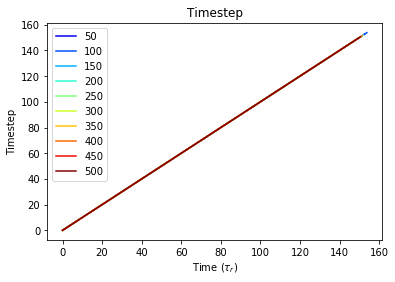

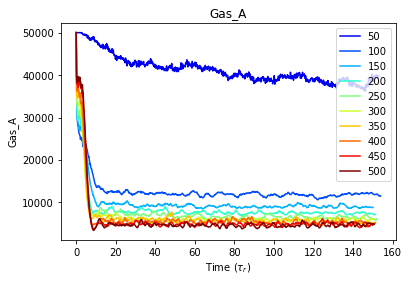

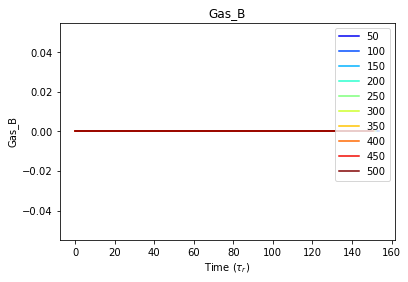

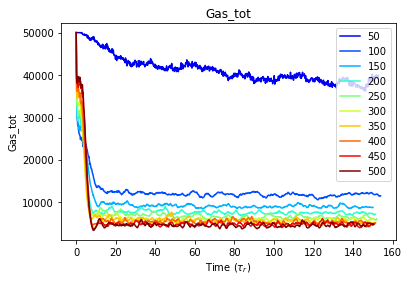

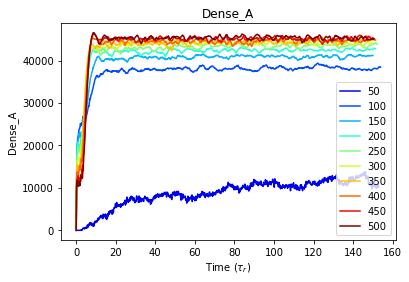

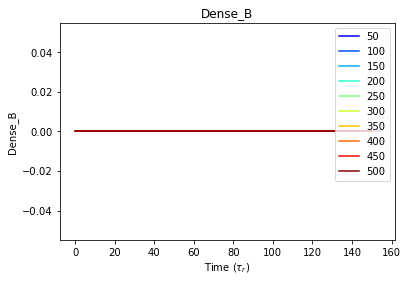

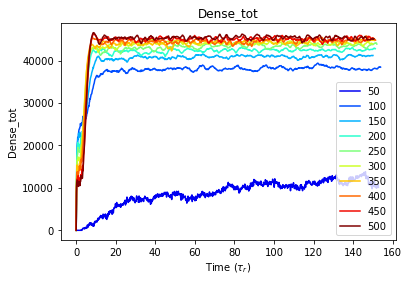

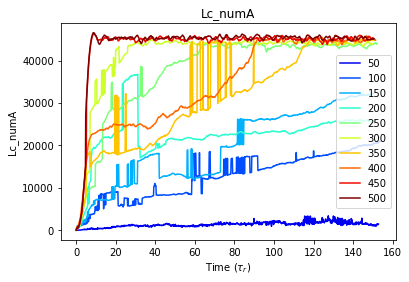

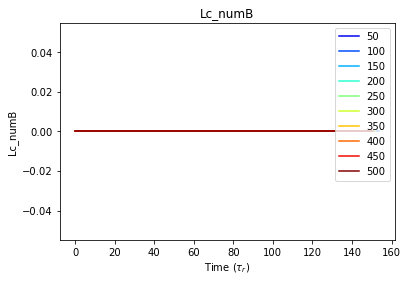

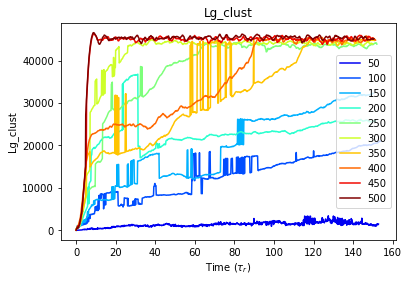

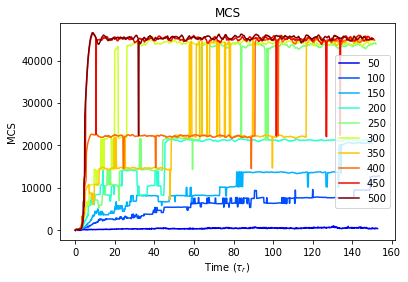

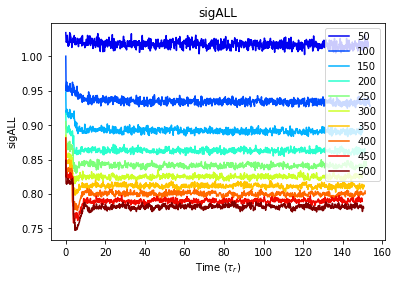

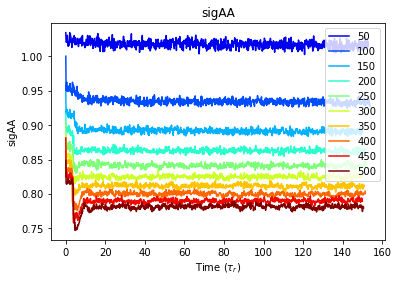

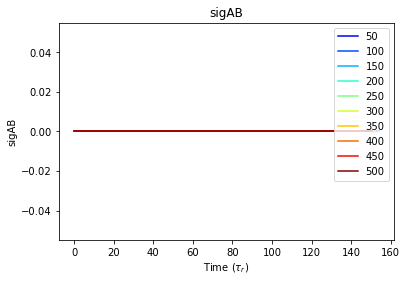

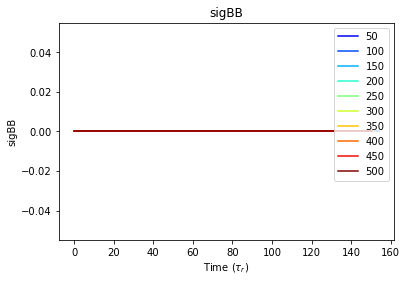

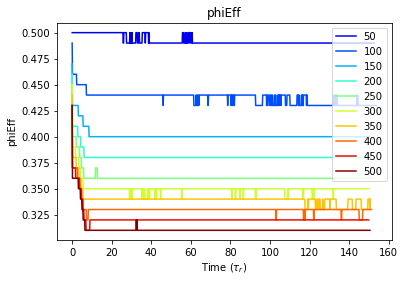

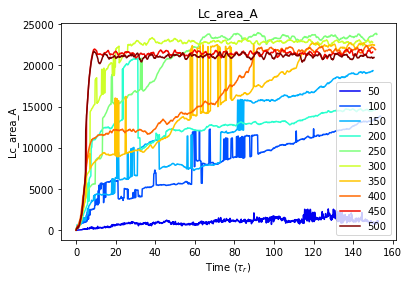

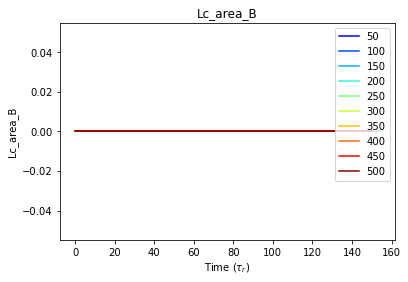

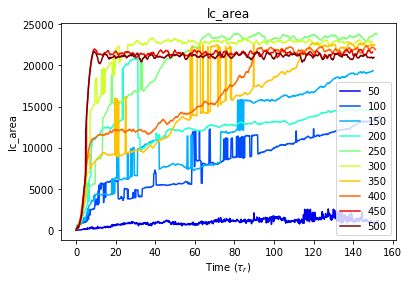

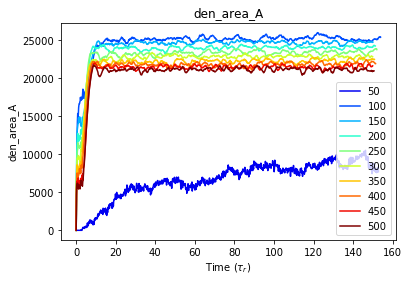

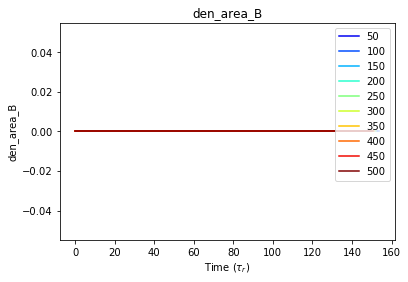

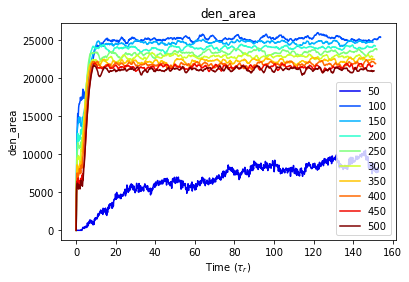

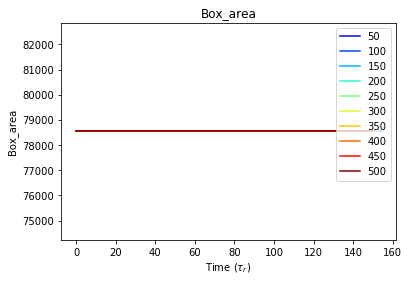

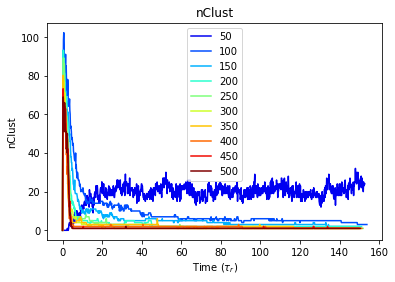

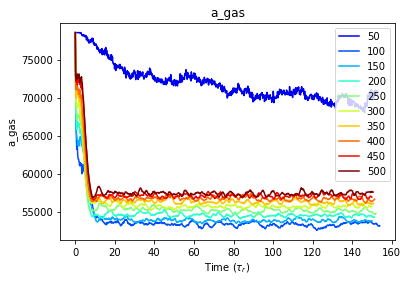

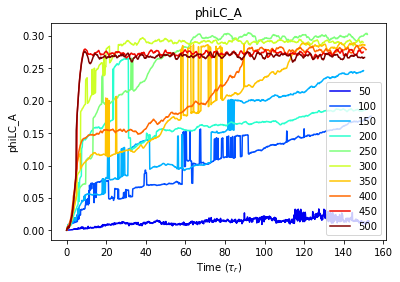

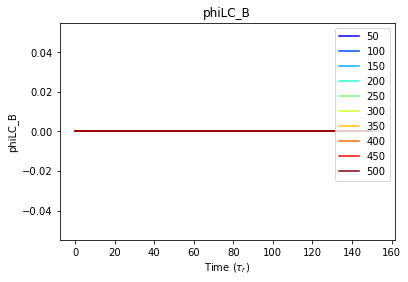

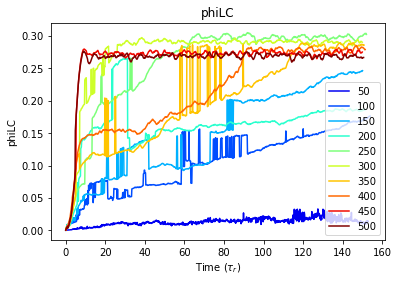

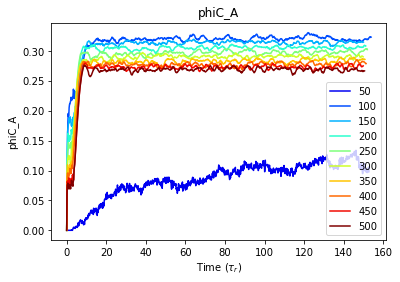

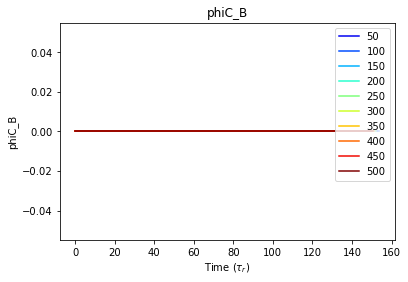

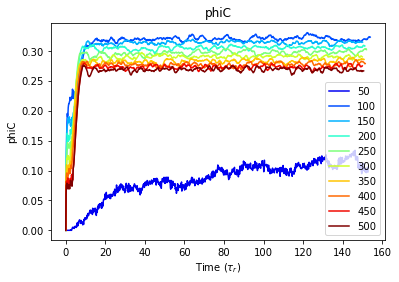

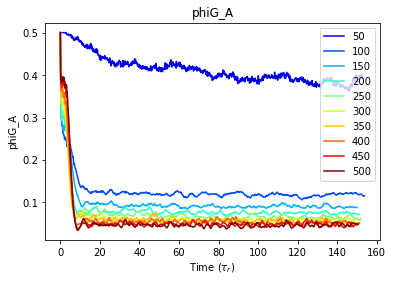

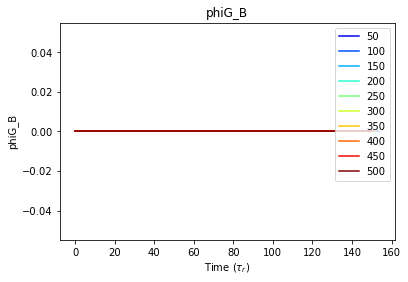

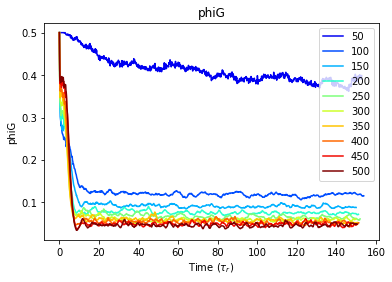

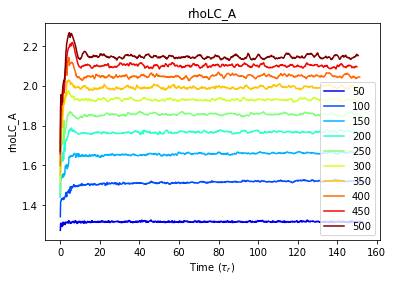

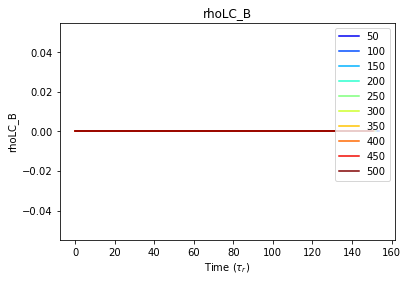

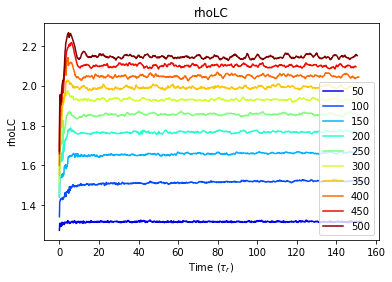

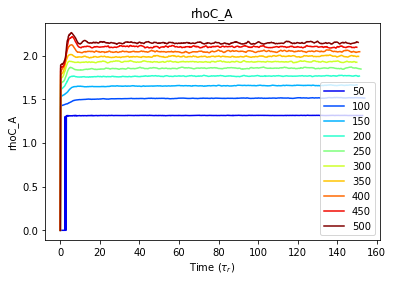

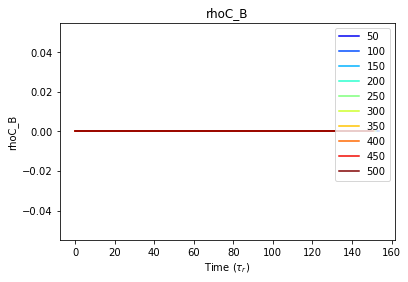

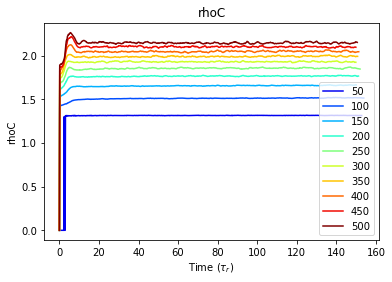

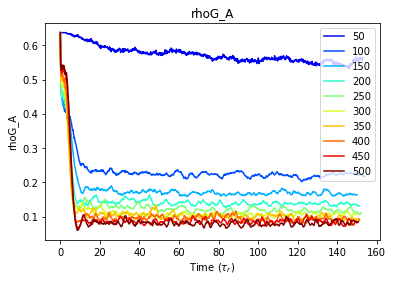

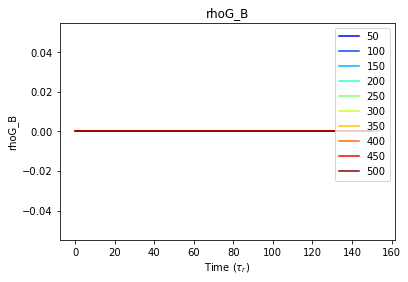

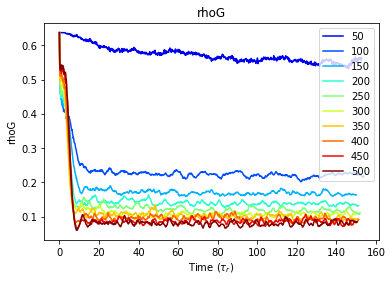

In [7]:
# %%capture
# Plot each column vs time for all files
for z in list(all_data[0]):
    for i in xrange(len(all_data)):
        plt.plot(all_data[i]['Timestep'], all_data[i][z], c=plt.cm.jet(params['pe'][i] / 500.), label=(params['pe'][i]))
    plt.xlabel(r'Time $(\tau_{r})$')
    plt.ylabel(z)
    plt.title(z)
    plt.legend()
    plt.show()

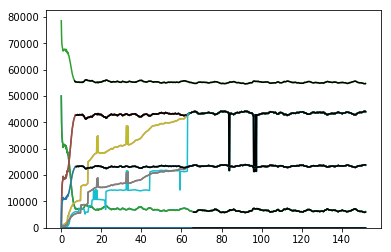

,Gas_A,Gas_B,Gas_tot,Dense_A,Dense_B,Dense_tot,Lc_numA,Lc_numB,Lg_clust,MCS,sigALL,sigAA,sigAB,sigBB,phiEff,Lc_area_A,Lc_area_B,lc_area,den_area_A,den_area_B,den_area,nClust,a_gas,phiLC_A,phiLC_B,phiLC,phiC_A,phiC_B,phiC,phiG_A,phiG_B,phiG,rhoLC_A,rhoLC_B,rhoLC,rhoC_A,rhoC_B,rhoC,rhoG_A,rhoG_B,rhoG
0,0.794217,0.0,0.794217,0.221555,0.0,0.221555,0.0307712,0.0,0.0307712,0.0102369,1.017805,1.017805,0.0,0.0,0.492220,1168.471910,0.0,1168.471910,8421.838497,0.0,8421.838497,0.000410766,71130.436506,0.014877,0.0,0.014877,0.107230,0.0,0.107230,0.397108,0.0,0.397108,1.316388,0.0,1.316388,1.314831,0.0,1.314831,0.564599,0.0,0.564599
1,0.23787,0.0,0.23787,0.761197,0.0,0.761197,0.405382,0.0,0.405382,0.254763,0.935037,0.935037,0.0,0.0,0.436878,13342.858091,0.0,13342.858091,25163.032146,0.0,25163.032146,6.00015e-05,53387.252360,0.169887,0.0,0.169887,0.320386,0.0,0.320386,0.118935,0.0,0.118935,1.514078,0.0,1.514078,1.509885,0.0,1.509885,0.222926,0.0,0.222926
2,0.183351,0.0,0.183351,0.816609,0.0,0.816609,0.629301,0.0,0.629301,0.41124,0.892286,0.892286,0.0,0.0,0.400208,18900.917689,0.0,18900.917689,24666.576187,0.0,24666.576187,4.00005e-05,53885.556648,0.240654,0.0,0.240654,0.314065,0.0,0.314065,0.091675,0.0,0.091675,1.657505,0.0,1.657505,1.654571,0.0,1.654571,0.170150,0.0,0.170150
3,0.153058,0.0,0.153058,0.846872,0.0,0.846872,0.474723,0.0,0.474723,0.424749,0.863454,0.863454,0.0,0.0,0.380103,13429.039525,0.0,13429.039525,23988.174628,0.0,23988.174628,4.00005e-05,54555.236461,0.170984,0.0,0.170984,0.305427,0.0,0.305427,0.076529,0.0,0.076529,1.767008,0.0,1.767008,1.764801,0.0,1.764801,0.140259,0.0,0.140259
4,0.129715,0.0,0.129715,0.865024,0.0,0.865024,0.870113,0.0,0.870113,0.863665,0.841814,0.841814,0.0,0.0,0.360114,23424.323062,0.0,23424.323062,23314.803467,0.0,23314.803467,2.03125e-05,55226.077704,0.298248,0.0,0.298248,0.296853,0.0,0.296853,0.064857,0.0,0.064857,1.856337,0.0,1.856337,1.854975,0.0,1.854975,0.117646,0.0,0.117646
5,0.119105,0.0,0.119105,0.87945,0.0,0.87945,0.879404,0.0,0.879404,0.866674,0.825270,0.825270,0.0,0.0,0.349473,22775.960943,0.0,22775.960943,22783.447360,0.0,22783.447360,2.06768e-05,55766.476824,0.289993,0.0,0.289993,0.290088,0.0,0.290088,0.059553,0.0,0.059553,1.931222,0.0,1.931222,1.929918,0.0,1.929918,0.106851,0.0,0.106851
6,0.112574,0.0,0.112574,0.883888,0.0,0.883888,0.792004,0.0,0.792004,0.653302,0.812067,0.812067,0.0,0.0,0.338860,19866.675235,0.0,19866.675235,22209.656526,0.0,22209.656526,3.06327e-05,56334.634205,0.252950,0.0,0.252950,0.282782,0.0,0.282782,0.056287,0.0,0.056287,1.992690,0.0,1.992690,1.990188,0.0,1.990188,0.100024,0.0,0.100024
7,0.107846,0.0,0.107846,0.892224,0.0,0.892224,0.897028,0.0,0.897028,0.896066,0.800032,0.800032,0.0,0.0,0.329741,21881.981454,0.0,21881.981454,21790.851452,0.0,21790.851452,2.00513e-05,56751.260100,0.278610,0.0,0.278610,0.277450,0.0,0.277450,0.053923,0.0,0.053923,2.050632,0.0,2.050632,2.048821,0.0,2.048821,0.094989,0.0,0.094989
8,0.0982502,0.0,0.0982502,0.9018,0.0,0.9018,0.901758,0.0,0.901758,0.898503,0.789780,0.789780,0.0,0.0,0.319864,21456.692653,0.0,21456.692653,21457.768780,0.0,21457.768780,2.01466e-05,57085.115438,0.273195,0.0,0.273195,0.273209,0.0,0.273209,0.049125,0.0,0.049125,2.104315,0.0,2.104315,2.104054,0.0,2.104054,0.086037,0.0,0.086037
9,0.0929592,0.0,0.0929592,0.907085,0.0,0.907085,0.907071,0.0,0.907071,0.906138,0.781299,0.781299,0.0,0.0,0.310042,21130.746628,0.0,21130.746628,21131.086165,0.0,21131.086165,2.00417e-05,57413.382921,0.269045,0.0,0.269045,0.269049,0.0,0.269049,0.046480,0.0,0.046480,2.149526,0.0,2.149526,2.148922,0.0,2.148922,0.080935,0.0,0.080935


In [8]:
# Let's compute a moving average of the data
winSz = 10
perc = 0.05
ssIndex = [[] for x in all_data]
headers = list(all_data[0])
headers.remove('Timestep')
headers.remove('Box_area')
ssAvg = pd.DataFrame(columns=headers)

# Get the index at which each data set is at steady-state
for i in xrange(len(all_data)):
    # List to store the steady-state column averages
    ssMean = []
    
    for j in headers:
        # Get the final window average
        match = np.mean(all_data[i][j][-winSz:-1])
        # Compute the moving average for the column
        movAvg = all_data[i][j].rolling(window=winSz).mean()
        # Threshold number of indices which must be in agreement
        thresh = 0
        count = 0
        
        # Get the index that steady-state begins
        for k in xrange(len(movAvg)):
            # If the moving average is within 5% of the final average...
            if ((1. - perc) * match) <= movAvg[k] <= ((1. + perc) * match):
                count += 1
                if count > thresh:
                    # Store the index
                    ssIndex[i].append(k)
                    # Compute the steady-state average
                    ssMean.append(np.mean(all_data[i][j][k:-1]))
                    break
            # Not within margin, reset the consecutive count
            else:
                count = 0
                
    # Append list of steady-state averages to dataframe
    ss_df = pd.DataFrame([ssMean], columns=headers)
    ssAvg = ssAvg.append(ss_df, ignore_index=True)

# Normalize by number of particles 
ssAvg['Gas_tot'] /= params['partAll']
ssAvg['Dense_tot'] /= params['partAll']
ssAvg['Lg_clust'] /= params['partAll']
ssAvg['MCS'] /= params['partAll']
ssAvg['nClust'] /= params['partAll']

# For type-A particles
ssAvg['Gas_A'] /= params['partA']
ssAvg['Dense_A'] /= params['partA']
ssAvg['Lc_numA'] /= params['partA']

# For type-B particles
if np.any(params['partB']):
    ssAvg['Gas_B'] /= params['partB']
    ssAvg['Dense_B'] /= params['partB']
    ssAvg['Lc_numB'] /= params['partB']

# Now let's check and see how we did with our averaging
for i in xrange(len(all_data)):
    # This is just to limit the output
    if params['pe'][i] == 250:
        count = 0
        for j in headers:
            # Plot the raw data
            plt.plot(all_data[i]['Timestep'], all_data[i][j])
            # Overlay the range we compute the steady-state average
            plt.plot(all_data[i]['Timestep'][ssIndex[i][count]:-1], all_data[i][j][ssIndex[i][count]:-1], c='k')
            count += 1
        plt.ylim(0)
        plt.show()
        
# print(ssIndex)
# print(ssMean)
display(ssAvg)

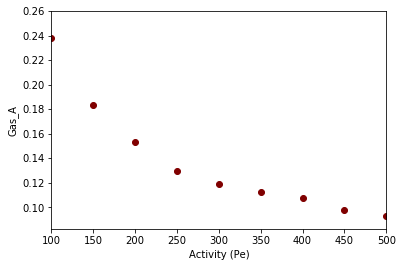

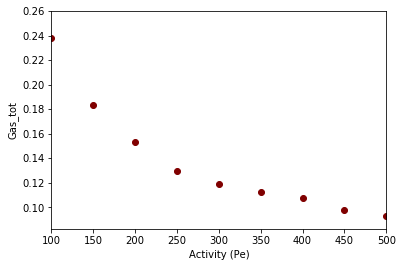

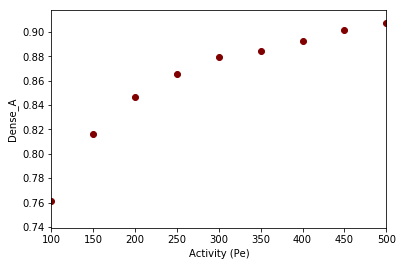

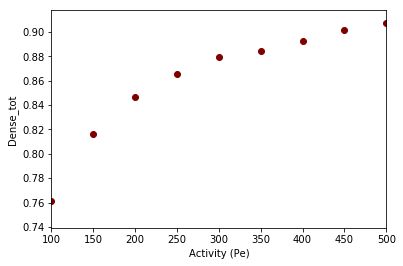

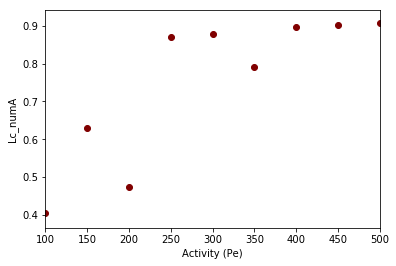

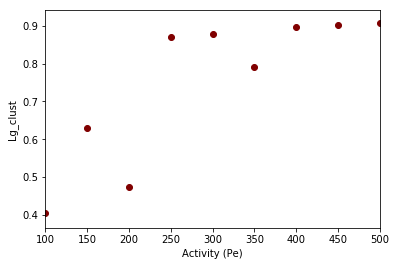

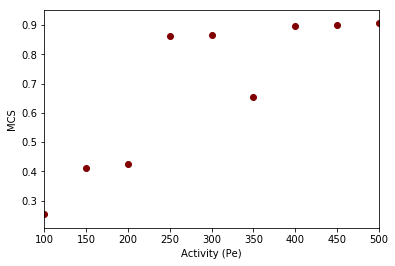

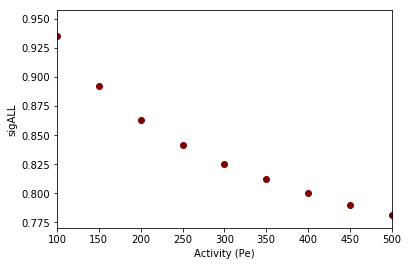

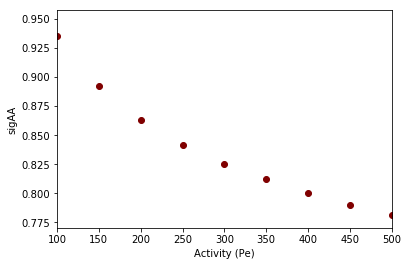

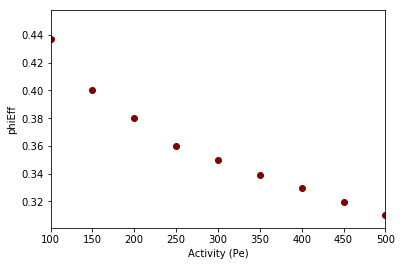

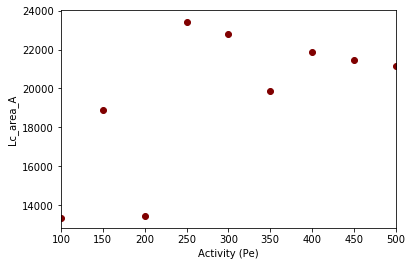

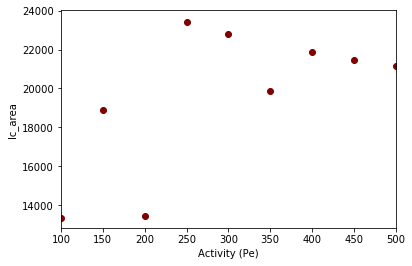

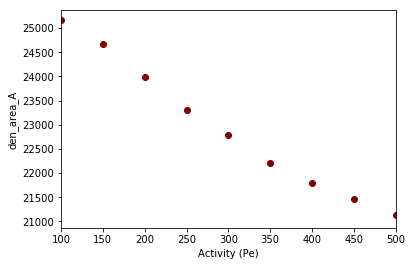

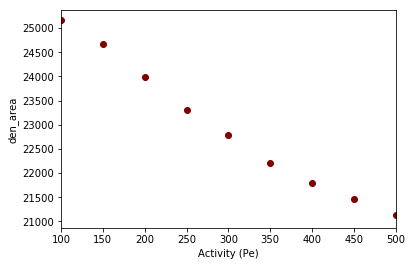

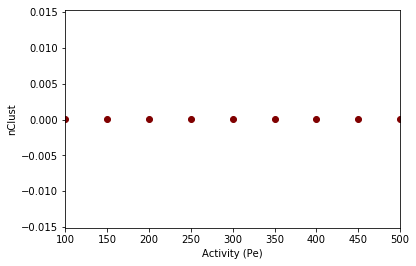

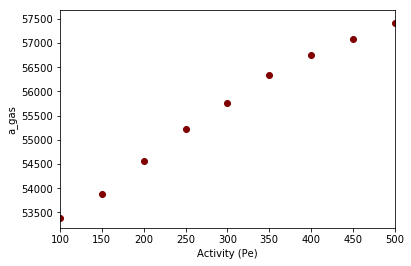

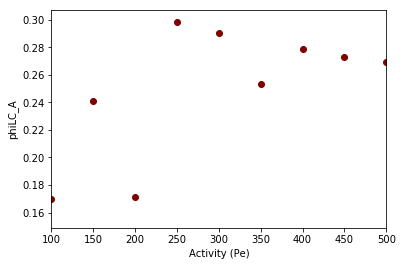

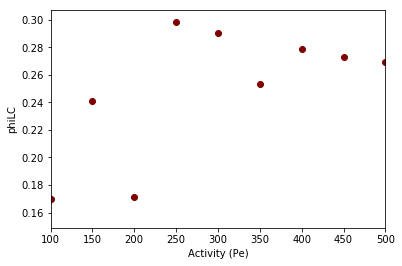

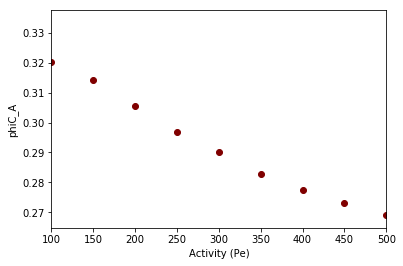

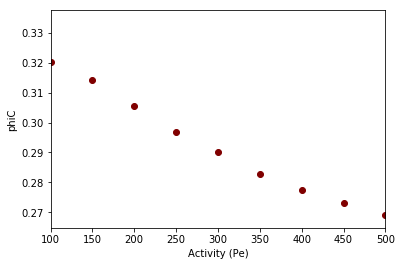

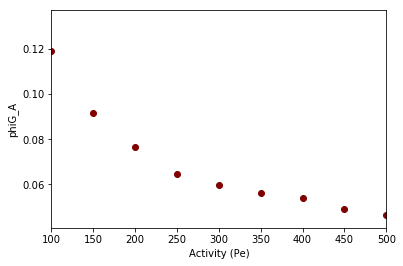

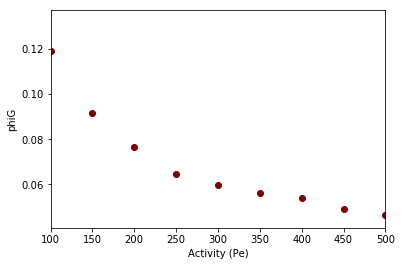

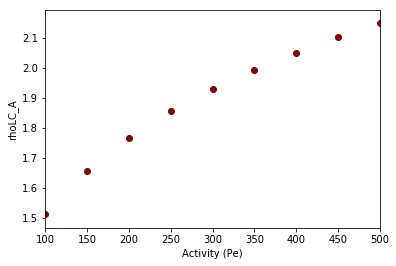

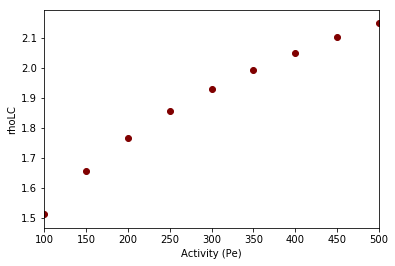

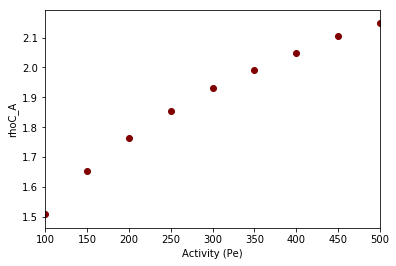

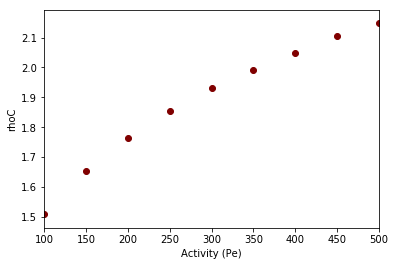

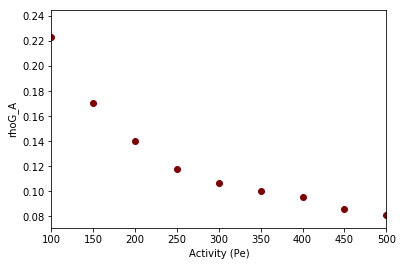

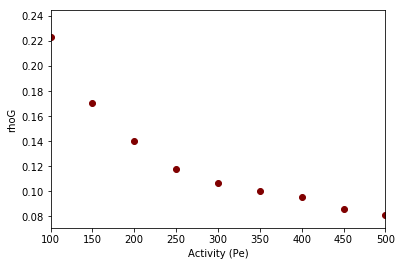

In [10]:
# Now plot the steady-state data vs input parameters
headers = list(ssAvg)
for z in headers:
    if np.any(ssAvg[z]):
        for i in xrange(len(all_data)):
            if params['pe'][i] != 50: 
                plt.scatter(params['pe'][i], ssAvg[z][i], c=plt.cm.jet(params['phi'][i] / 50.))
        plt.xlabel(r'Activity (Pe)')
        plt.ylabel(z)
        plt.xlim(100,500)
        plt.show()